In [25]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import csv

dfWeather = pd.read_csv('TargetData/Weather.csv')
dfSeoulDaily = pd.read_csv('TargetData/TimeProvinceDaily.csv')
dfDaeguDaily = pd.read_csv('TargetData/TimeDaeguDaily.csv')
dfSeoulDaily['date'] = pd.to_datetime(dfSeoulDaily['date'])
dfDaeguDaily['date'] = pd.to_datetime(dfDaeguDaily['date'])
dfWeather['date'] = pd.to_datetime(dfWeather['date'])

print(dfWeather[dfWeather['province']=='Seoul'])
print(dfSeoulDaily.info())
print(dfDaeguDaily)

writer = pd.ExcelWriter('data/DailySeoul.xlsx', engine='xlsxwriter')
dfSeoulDaily.to_excel(writer, sheet_name='Sheet1')
writer.close()

writer = pd.ExcelWriter('data/Weather.xlsx', engine='xlsxwriter')
dfWeather.to_excel(writer, sheet_name='Sheet1')
writer.close()

writer = pd.ExcelWriter('data/DailyDaegu.xlsx', engine='xlsxwriter')
dfDaeguDaily.to_excel(writer, sheet_name='Sheet1')
writer.close()

        code province       date  avg_temp  min_temp  max_temp  precipitation  \
0      10000    Seoul 2016-01-01       1.2      -3.3       4.0            0.0   
16     10000    Seoul 2016-01-02       5.7       1.0       9.5            0.0   
32     10000    Seoul 2016-01-03       6.5       5.1       9.4            0.0   
48     10000    Seoul 2016-01-04       2.0      -2.5       5.3            0.0   
64     10000    Seoul 2016-01-05      -2.7      -4.8       1.5            0.0   
...      ...      ...        ...       ...       ...       ...            ...   
25727  10000    Seoul 2020-05-27      17.4      11.8      23.9            0.0   
25743  10000    Seoul 2020-05-28      18.7      14.2      23.4            0.0   
25759  10000    Seoul 2020-05-29      20.7      14.6      27.6            0.0   
25775  10000    Seoul 2020-05-30      22.6      16.5      30.0            0.0   
25791  10000    Seoul 2020-05-31      21.2      17.6      28.0            0.0   

       max_wind_speed  most

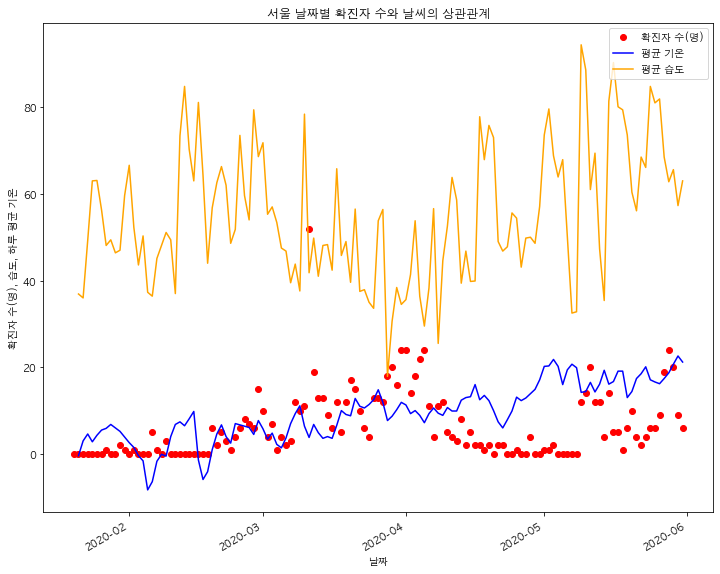

In [23]:
x = dfSeoulDaily['date']
y = dfSeoulDaily['confirmed']

df = dfWeather[dfWeather['province']=='Seoul']
start_date = '2020-01-20'
end_date = '2020-05-31'
mask = (dfWeather['date'] > start_date) & (dfWeather['date'] <= end_date)
df = df.loc[mask]

x2 = df['date']
y2 = df['avg_temp']

x3 = df['date']
y3 = df['avg_relative_humidity']

plt.rc('font',family="AppleGothic")
plt.rcParams["figure.figsize"] = (12,10)
plt.plot(x,y,'ro',label="확진자 수(명)")
plt.plot(x2, y2, color='blue', label="평균 기온")
plt.plot(x3, y3, color='orange', label="평균 습도")
plt.legend(loc="upper right")
plt.gca().xaxis.set_major_locator(matplotlib.dates.MonthLocator()) 
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%m"))
plt.gcf().autofmt_xdate()

plt.title('서울 날짜별 확진자 수와 날씨의 상관관계')
plt.xlabel('날짜')
plt.ylabel('확진자 수(명), 습도, 하루 평균 기온')
fig = plt.gcf()
fig.savefig('data/Weather_confirmed.png', dpi=300)
plt.show()


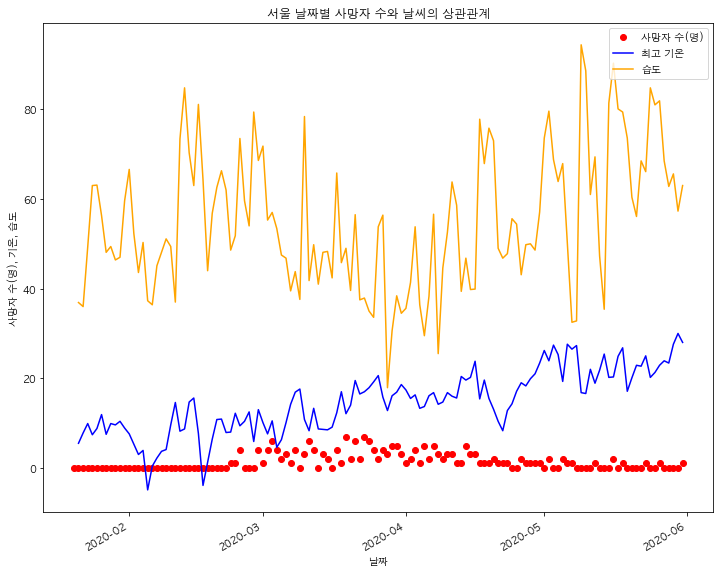

In [24]:
x = dfDaeguDaily['date']
y = dfDaeguDaily['deceased']

df = dfWeather[dfWeather['province']=='Seoul']
start_date = '2020-01-20'
end_date = '2020-05-31'
mask = (dfWeather['date'] > start_date) & (dfWeather['date'] <= end_date)
df = df.loc[mask]

x2 = df['date']
y2 = df['max_temp']

x3 = df['date']
y3 = df['avg_relative_humidity']

plt.rcParams["figure.figsize"] = (12,10)
plt.plot(x,y,'ro', label="사망자 수(명)")
plt.plot(x2, y2, color='blue', label="최고 기온")
plt.plot(x3, y3, color='orange', label="습도")
plt.title('서울 날짜별 사망자 수와 날씨의 상관관계')
plt.legend(loc="upper right")
plt.gca().xaxis.set_major_locator(matplotlib.dates.MonthLocator()) 
plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%m"))
plt.gcf().autofmt_xdate()
plt.xlabel('날짜')
plt.ylabel('사망자 수(명), 기온, 습도')
fig = plt.gcf()
fig.savefig('data/Weather_deceased.png', dpi=300)
plt.show()